## Statistical Learning Project

### By Ajay Kumar

Data Description: 

The data at hand contains medical costs of people characterized by certain 
attributes. 

Domain: 
Healthcare

Context: 
Leveraging customer information is paramount for most businesses. In the case 
of an insurance company, attributes of customers like the ones mentioned 
below can be crucial in making business decisions. Hence, knowing to explore 
and generate value out of such data can be an invaluable skill to have. 

Attribute Information: 

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are 
relatively high or low relative to height, objective index of body weight (kg / m ^ 
2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of 
dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, 
southwest, northwest.

charges: Individual medical costs billed by health insurance.


## Q1. Import the necessary libraries

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Q2. Read the data as a data frame 

In [42]:
# Read the data as a data frame using pandas read_csv command
df = pd.read_csv('/content/drive/MyDrive/AIML PROJECT/STATS/insurance.csv') 

In [43]:
df.head()  #Checking the head of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## QPerform basic EDA which should include the following and print out your insights at every step.

a. Shape of the data

b. Data type of each attribute

c. Checking the presence of missing values

d. 5 point summary of numerical attributes

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges 
columns

h. Distribution of categorical columns (include children)

i. Pair plot that includes all the columns of the data frame

In [44]:
df.shape # Shape of the Dataset

(1338, 7)

In [45]:
df.dtypes # Data types 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
df.info()  # Info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type

In [47]:
df.isnull().sum().any()   #Checking the presence of missing values

False

- There are no null values in the Dataset

In [48]:
df.duplicated().sum() # Checking the presence of duplicate values

1

In [49]:
df.drop_duplicates(inplace=True) # Droping the duplicate values
df.duplicated().sum()

0

In [50]:
df.describe().T   # Five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


 - Data looks extreamly good and the mean standard deviation of the variables are not scaled

 - Age: data looks representative of the true age distribution of the adult population

 - Children: 75% of the people have 2 or less children

 - Charges:  It is higly skewed as most people would require basic medi-care and only.

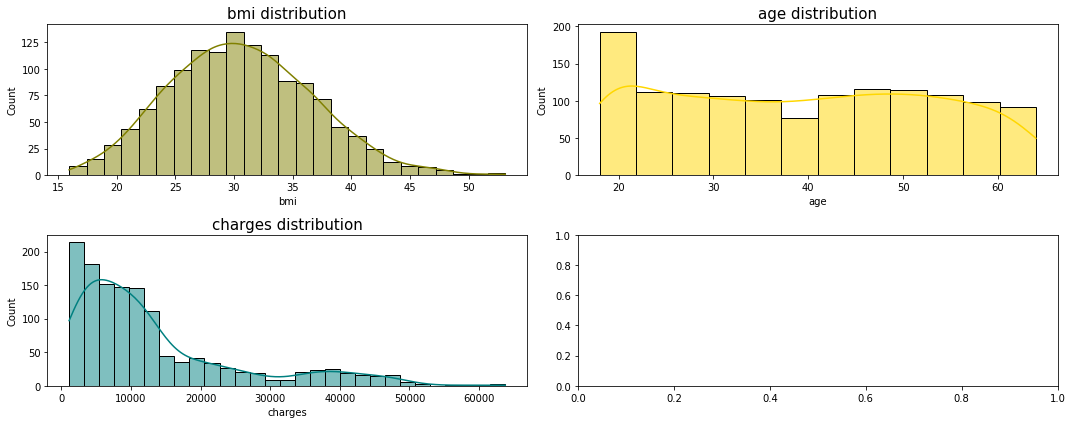

In [51]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,6)
a = sns.histplot(df['bmi'], ax=axes[0][0], kde=True, color='olive');
a.set_title('bmi distribution', fontsize=15)

a = sns.histplot(df['age'], ax=axes[0][1], kde=True, color='gold');
a.set_title('age distribution', fontsize=15)

a = sns.histplot(df['charges'], ax=axes[1][0], kde=True, color='teal');
a.set_title('charges distribution', fontsize=15)

plt.tight_layout()

plt.show()

- variable bmi is normally distributed 
- Age seems be distributed quiet uniformly 
- variable charges are highly right skewed.

Text(0, 0.5, 'Level of skewness in each variable')

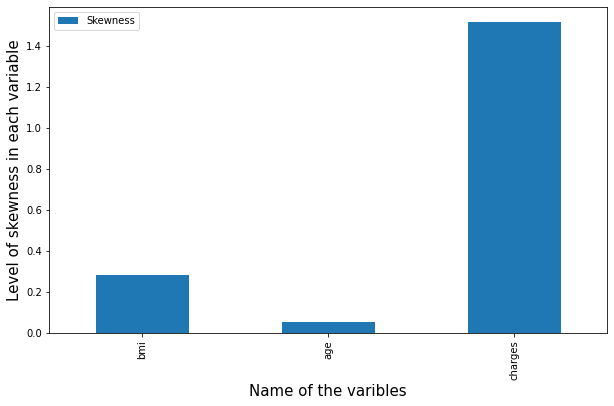

In [52]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df['bmi']),stats.skew(df['age']),stats.skew(df['charges'])]},
                        index=['bmi','age','charges'])
Skewness.plot(kind='bar',figsize=(10,6));
plt.xlabel('Name of the varibles', fontsize=15)
plt.ylabel('Level of skewness in each variable', fontsize=15)

- Skew in bmi is very less i.e 0.3
- age is uniformly distributed and skewness is almost neglegible
- charges are highly skewed as we can see the above plot

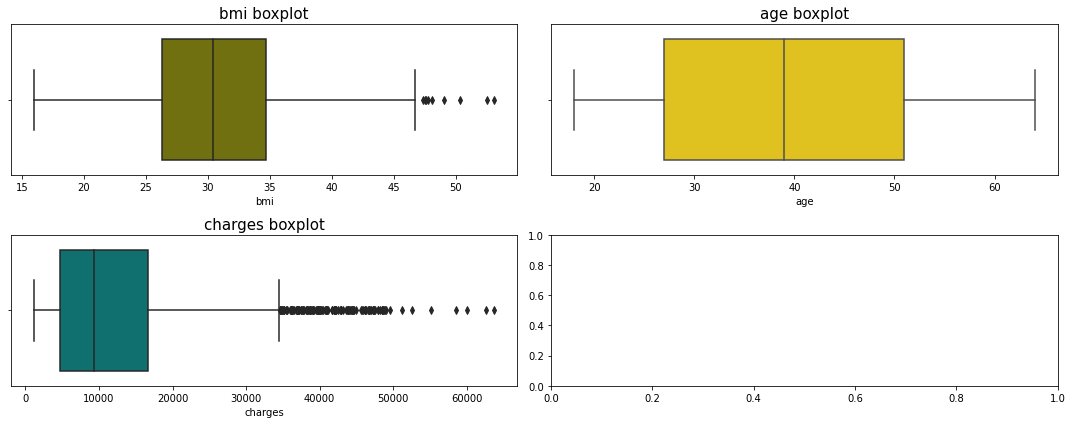

In [53]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,6)
a = sns.boxplot(df['bmi'], ax=axes[0][0],color='olive');
a.set_title('bmi boxplot', fontsize=15)

a = sns.boxplot(df['age'], ax=axes[0][1], color='gold');
a.set_title('age boxplot', fontsize=15)

a = sns.boxplot(df['charges'], ax=axes[1][0],color='teal');
a.set_title('charges boxplot', fontsize=15)

plt.tight_layout()

plt.show()

- variable bmi has a few upper outliers values 
- age has no outliers
- charges as it is highly right skewed and has many upper outliers

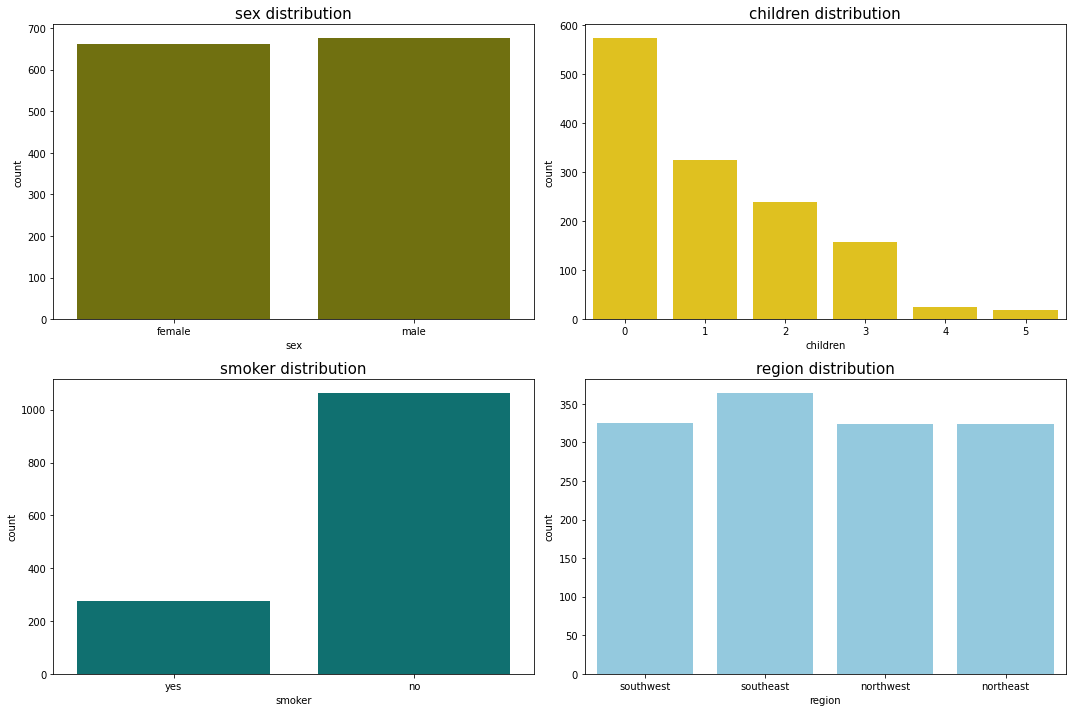

In [54]:
# Distribution of categorical columns (include children)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,10)
a = sns.countplot(df['sex'], ax=axes[0][0],color='olive');
a.set_title('sex distribution', fontsize=15)

a = sns.countplot(df['children'], ax=axes[0][1], color='gold');
a.set_title('children distribution', fontsize=15)

a = sns.countplot(df['smoker'], ax=axes[1][0],color='teal');
a.set_title('smoker distribution', fontsize=15)

a = sns.countplot(df['region'], ax=axes[1][1],color='skyblue');
a.set_title('region distribution', fontsize=15)

plt.tight_layout()

plt.show()

- No. of Male and Female are aproximately same
- Less than 2 children are more and very few have 4 or 5 children
- non-smokers are moreas compare to smokers in the data
- Instances are distributed evenly accross all regions


### Bi-variate distribution of every possible attribute pair

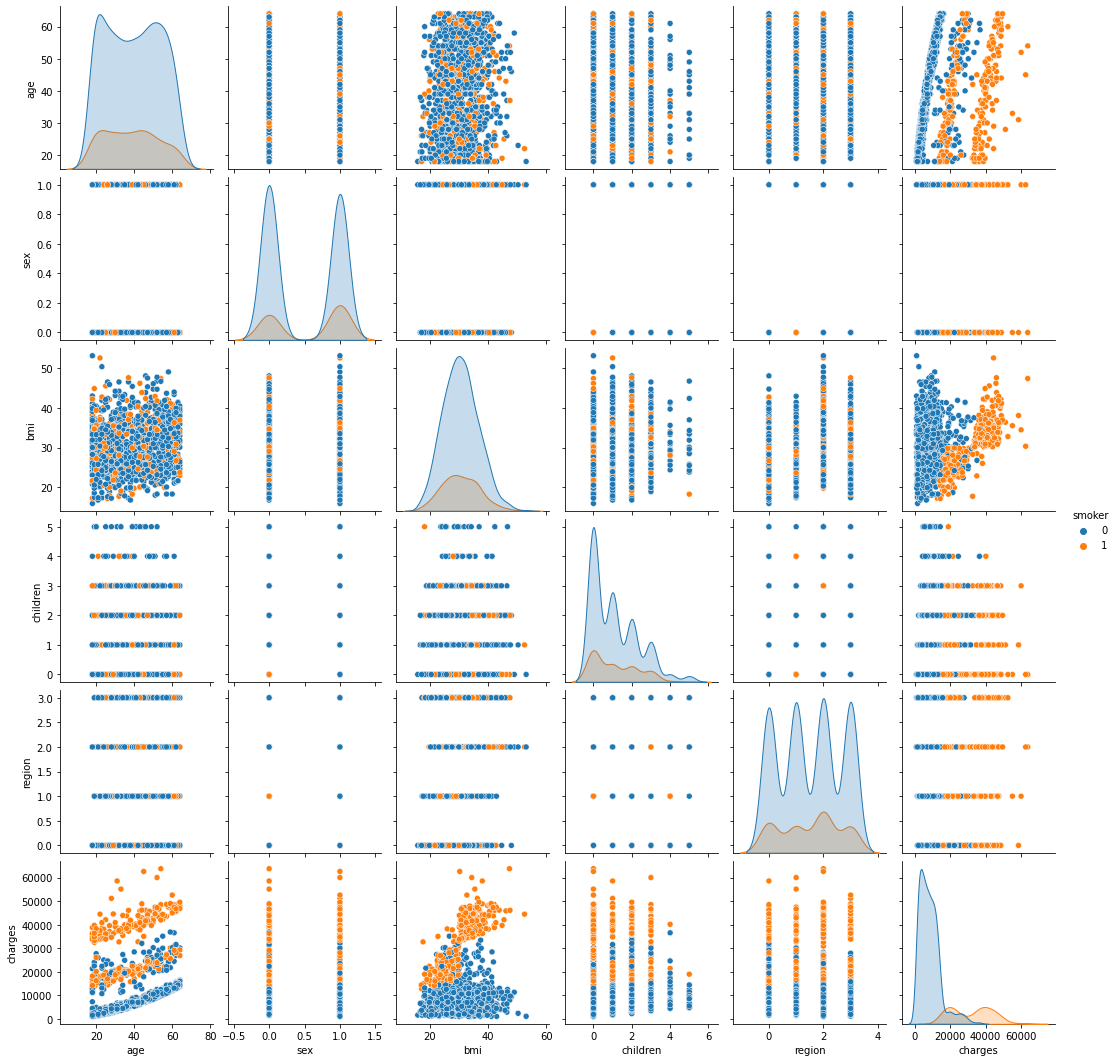

In [55]:
# Converting all the 
df1 = copy.deepcopy(df)
for feature in df1.columns:
  if df1[feature].dtypes == 'object':
    df1[feature] = pd.Categorical(df1[feature]).codes
sns.pairplot(df1, diag_kind='kde', hue='smoker')  #pairplot
plt.show()

- 'smokers' have the higher charges which indicates that smokers claimed more money than non-smokers

- 'age' and 'charges have showing some patterns older people are charged more than the younger ones and the charges are aslo increasing if he or she smokes

- The one who have higher bmi also charged more

## 4. Answer the following questions with statistical evidence
### (a). Do charges of people who smoke differ significantly from the people who don't?

In [56]:
 df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

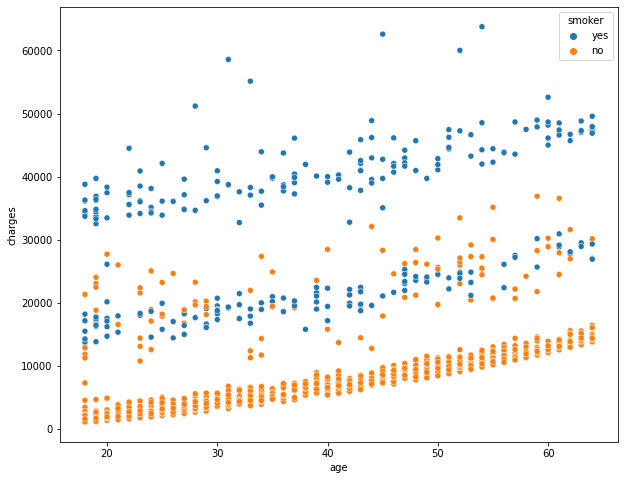

In [57]:
# Scatter plot to look charges of people who smoke differ significantly from the people who don't
plt.figure(figsize=(10,8))
sns.scatterplot(df['age'], df['charges'],hue=df['smoker'])
plt.show()

- The scatterplot shows charges for smokers  is more as compare to non-smokers w.r.t ages

In [58]:
# Conducting T-test to check dependency of smoking on charges
H0 = "Charges are same for both smoker and non-smoker "   # Stating the Null Hypothesis
H1 = "Charges are not same for smoker and non-smoker "   # Stating the Alternate Hypothesis

x = np.array(df[df['smoker'] == 'yes'].charges)  
y = np.array(df[df['smoker'] == 'no'].charges) 

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)
print(p_value)

# Significance level at 5%
if p_value < 0.05:  
    print('Charges are not same for smoker and non-smokeras as the p_value < 0.05')
else:
    print('Charges are same for both smoker and non-smokeras the p_value > 0.05')

1.4067220949376498e-282
Charges are not same for smoker and non-smokeras as the p_value < 0.05


 *  After conducting the T-test the p-value says Smokers are claiming more money than non-smokers

## (b). Does bmi of males differ significantly from that of females?

In [59]:
#Checking the distribution of males and females
df['sex'].value_counts()   

male      675
female    662
Name: sex, dtype: int64

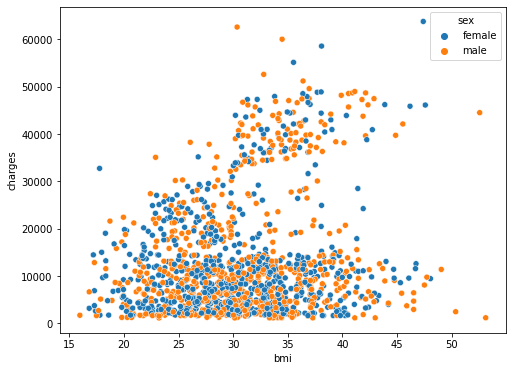

In [60]:
# Checking the scatter plot of bmi and sex
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'bmi', y ='charges', hue='sex', data=df)
plt.show()

- Visually, the bmi for male and female are distributed like cloud and looks similler. Charges are also similler for sex with increasing bmi.

In [61]:
 # T-test to check dependency of bmi on gender
H0 = "Gender has no effect on bmi"   # Null Hypothesis
H1 = "Gender has an effect on bmi"   # Alternate Hypothesis

# Converting the bmi values into array
x = np.array(df[df['sex'] == 'male'].bmi)  
y = np.array(df[df['sex'] == 'female'].bmi) 


# Conducting Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)
print('p_value:',p_value) 

# Significance level at 5%
if p_value < 0.05: 
    print(f'{H1} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value.round(3)}) > 0.05')

p_value: 0.08991704324931137
Gender has no effect on bmi as the p_value (0.09) > 0.05


* bmi of both the genders are identical as p-value is less than the level of significance i.e 0.05.

## (C). Is the proportion of smokers significantly different in different genders?

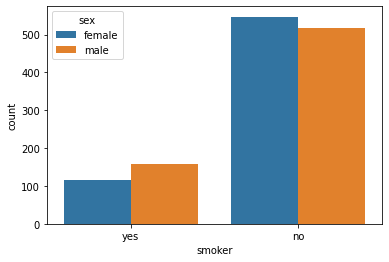

In [62]:
sns.countplot(x='smoker', hue='sex', data=df);

The above bar graph indicates that proportion of smokers significantly different in different genders but conducting Chi_square test for confirmation

In [63]:
cross_tab_data = pd.crosstab(df['sex'],df['smoker']) 
cross_tab_data

smoker,no,yes
sex,,
female,547,115
male,516,159


In [64]:
# Chi_square test as both the variables are categirical in nature

# Null Hypothesis
H0 = "Gender has no effect on smoking habits" 
# Alternate Hypothesis  
H1 = "Gender has an effect on smoking habits"   

chi, p_value, dof, expected =  stats.chi2_contingency(cross_tab_data)
print('p_value:',p_value)

# Significance level at 5%
if p_value < 0.05:  
    print(f'{H1} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value.round(3)}) > 0.05')

p_value: 0.0062765550120107375
Gender has an effect on smoking habits as the p_value (0.006) < 0.05


* The calculated p_value is less than the level of significance i.e alpha= 0.05. Proportion of smokers in males is significantly different from that of the females

## (d). Is the distribution of bmi across women with no children, one child and two children, the same ?

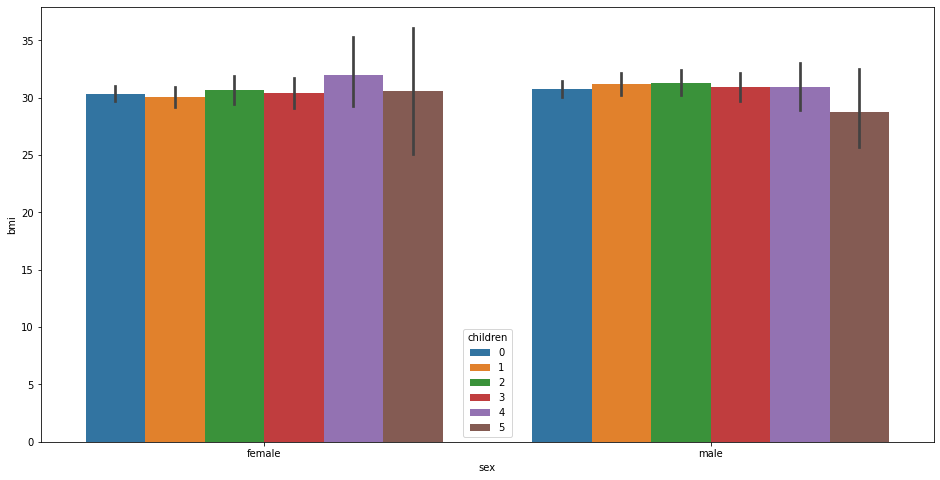

In [65]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'sex', y = 'bmi', hue='children', data=df, );

The above bar grapg shows that the bmi for women having 0, 1 and 2 children same i.e it has no effect on bmi

In [66]:
# Test to see if the distributions of bmi are different

# Null Hypothesis
H0 = "Number of children has no effect on bmi"  
# Alternate Hypothesis 
H1 = "Number of children has an effect on bmi"   


women = copy.deepcopy(df[df['sex'] == 'female'])

children_0 = women[women['children'] == 0]['bmi']
children_1 = women[women['children'] == 1]['bmi']
children_2 = women[women['children'] == 2]['bmi']


f_stat, p_value = stats.f_oneway(children_0, children_1, children_2)
print('p_value:',p_value)

# Significance level at 5%
if p_value < 0.05:  
    print('Number of children has an effect on bmi as the p_value < 0.05')
else:
    print('Number of children has no effect on bmi as the p_value > 0.05')

p_value: 0.7158579926754841
Number of children has no effect on bmi as the p_value > 0.05


* The calculated p_value(0.7158579926754841) is greater that the level of significance therfore bmi is not changing by the number of children.